In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# read dataset and preview
df = pd.read_csv('classification_dataset.csv')
df.info(), df, df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


(None,
            x1        x2  label
 0    2.129573  0.629904      1
 1    1.888882  0.146257      1
 2   -0.190357  0.383993      0
 3   -0.404416  0.195282      1
 4    0.373012 -0.429716      1
 ..        ...       ...    ...
 995  1.620491  0.309480      1
 996  0.229913  1.004463      0
 997  0.390582 -0.841455      1
 998  0.244432  0.024923      1
 999  0.428816 -0.591180      1
 
 [1000 rows x 3 columns],
                 x1           x2       label
 count  1000.000000  1000.000000  1000.00000
 mean      0.503665     0.246225     0.50000
 std       0.919698     0.584413     0.50025
 min      -1.597796    -1.262787     0.00000
 25%      -0.139181    -0.233408     0.00000
 50%       0.484482     0.255091     0.50000
 75%       1.167204     0.676270     1.00000
 max       2.706983     1.805190     1.00000)

<function matplotlib.pyplot.show(close=None, block=None)>

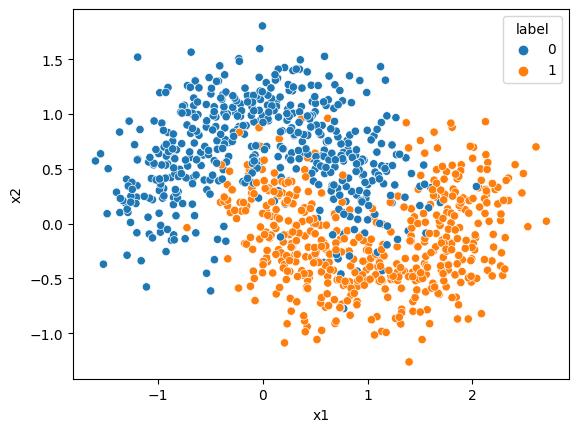

In [3]:
# scatterplot of dataframe
sb.scatterplot(df,x='x1',y='x2',hue='label')
plt.show

In [4]:
# create variables for models
X = df[list(df.columns[:2])].to_numpy().reshape(-1,2)
y = df['label'].to_numpy()
X.shape, y.shape, X[:10], y[:10]

((1000, 2),
 (1000,),
 array([[ 2.12957268,  0.62990385],
        [ 1.8888818 ,  0.1462573 ],
        [-0.19035705,  0.38399281],
        [-0.40441619,  0.19528201],
        [ 0.37301216, -0.42971569],
        [ 1.89472086,  0.53718214],
        [ 0.8116396 ,  0.67614677],
        [-0.0117708 ,  0.93414674],
        [-0.90867526,  0.54521076],
        [ 0.59737656, -0.76238004]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1]))

In [5]:
# create test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((800, 2), (200, 2))

Accuracy: 0.825
Confusion Matrix:
[[78 21]
 [14 87]]


<Axes: >

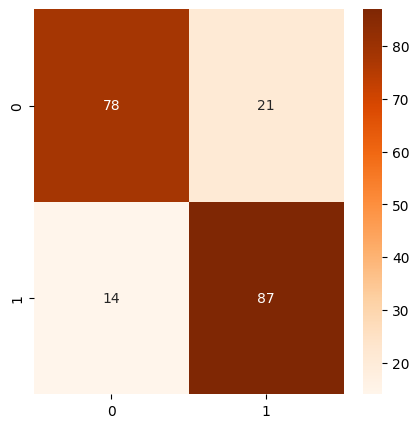

In [6]:
# logistic regression and performance
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
test_pred = logreg.predict(X_test)
acc = accuracy_score(test_pred,y_test)
cm = confusion_matrix(test_pred,y_test)
print(f"Accuracy: {acc}\nConfusion Matrix:\n{cm}")
plt.figure(figsize=(5,5))
sb.heatmap(cm,cmap='Oranges',annot=True)

In [7]:
# learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=logreg,X=X,y=y,train_sizes=[25,50,75,100,150,275,400,600,800],cv=5,scoring='accuracy')
train_sizes, train_scores[:4], test_scores[:4]

(array([ 25,  50,  75, 100, 150, 275, 400, 600, 800]),
 array([[0.92, 0.84, 0.84, 0.84, 0.84],
        [0.72, 0.9 , 0.9 , 0.9 , 0.9 ],
        [0.76, 0.88, 0.88, 0.88, 0.88],
        [0.79, 0.89, 0.89, 0.89, 0.89]]),
 array([[0.75 , 0.82 , 0.83 , 0.83 , 0.805],
        [0.855, 0.83 , 0.835, 0.84 , 0.81 ],
        [0.88 , 0.82 , 0.845, 0.84 , 0.805],
        [0.875, 0.82 , 0.85 , 0.84 , 0.815]]))

In [8]:
# performance metrics for different sizes
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_mean, test_scores_mean

(array([0.856     , 0.864     , 0.856     , 0.87      , 0.85066667,
        0.85163636, 0.8515    , 0.85      , 0.84575   ]),
 array([0.807, 0.834, 0.838, 0.84 , 0.841, 0.841, 0.845, 0.84 , 0.846]))

(0.6, 1.0)

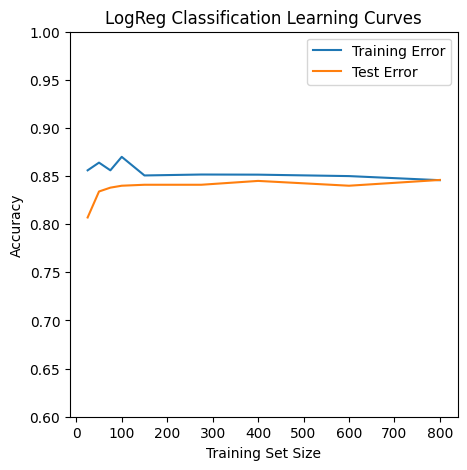

In [9]:
# plot learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes,train_scores_mean,label='Training Error')
plt.plot(train_sizes,test_scores_mean,label='Test Error')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('LogReg Classification Learning Curves')
plt.legend()
plt.ylim(0.6,1)

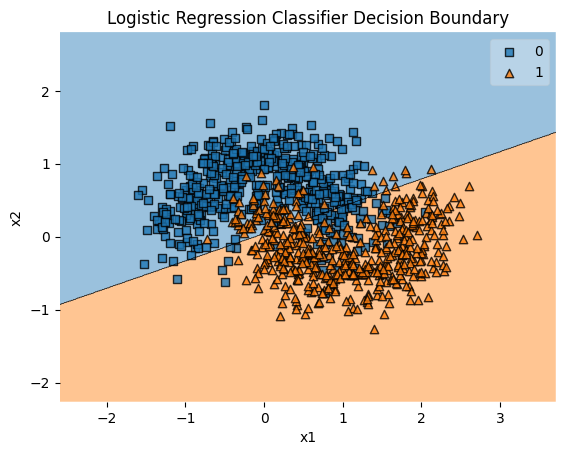

In [10]:
# plot decision boundary with mlxtend
plot_decision_regions(X,y,clf=logreg,legend=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Classifier Decision Boundary')
plt.show()

Based on the learning curves plot we can see that the variance is low while the bias is high. Since the curves are already converging, one way to address this could be addressed to add more features. The high bias is a sign that the model is underfitting.

Looking at the scatterplot reveals why our model has high bias and is underfitting. This is because we are using a linear classifier for a non linear boundary. Therefore there will always be an unavoidable bias and underfitting.

To improve the accuracy with a logistic regression model we should increase the order of the data to represent a polynomial.

In [11]:
# random forest
n_estimators = [10,50,100]
max_depth = [None,10,20,30]
param_grid = {'n_estimators': n_estimators,'max_depth': max_depth}
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
acc = accuracy_score(rfc.predict(X_test),y_test)
grid_search = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring='accuracy')
print(grid_search.fit(X,y), acc)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy') 0.905


In [12]:
# best parameters and score for random forest
bestp = grid_search.best_params_
bests = grid_search.best_score_
bestp, bests

({'max_depth': 10, 'n_estimators': 100}, 0.9040000000000001)

Accuracy: 0.91
Confusion Matrix:
[[85 11]
 [ 7 97]]


<Axes: >

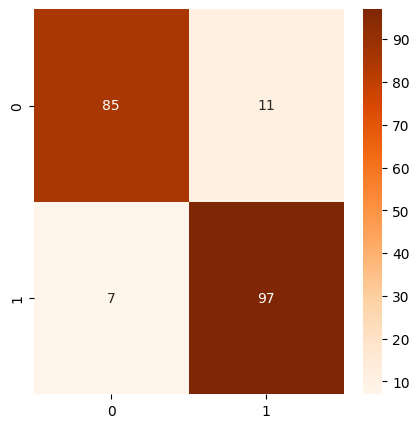

In [13]:
# random forest model on test data
rfc2 = RandomForestClassifier(**bestp)
rfc2.fit(X_train,y_train)
test_pred = rfc2.predict(X_test)
acc = accuracy_score(y_test,test_pred)
cm = confusion_matrix(test_pred,y_test)
print(f"Accuracy: {acc}\nConfusion Matrix:\n{cm}")
plt.figure(figsize=(5,5))
sb.heatmap(cm,cmap='Oranges',annot=True)

Test Accuracy: 0.91


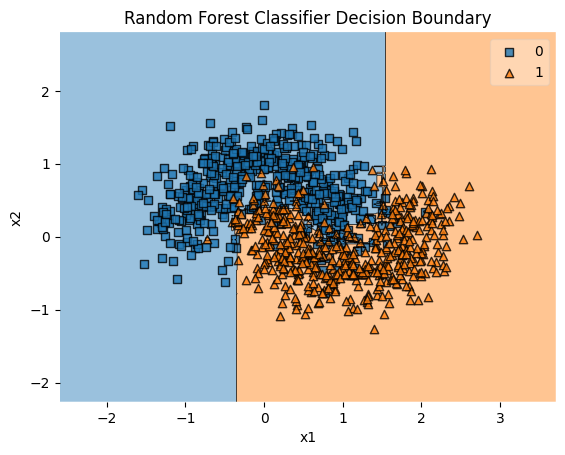

In [14]:
# plot decision boundary with mlxtend
plot_decision_regions(X,y,clf=rfc2,legend=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random Forest Classifier Decision Boundary')
print(f"Test Accuracy: {acc}")
plt.show()

In [15]:
# svm
C = [0.1,1,11]
kernel = ['linear','rbf']
param_grid = {'C': C,'kernel': kernel}
svc = SVC()
svc.fit(X_train,y_train)
acc = accuracy_score(svc.predict(X_test),y_test)
grid_search = GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y), acc

(GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.1, 1, 11], 'kernel': ['linear', 'rbf']},
              scoring='accuracy'),
 0.92)

In [16]:
# best parameters and score for svm
bestp = grid_search.best_params_
bests = grid_search.best_score_
bestp, bests

({'C': 11, 'kernel': 'rbf'}, 0.915)

Accuracy: 0.925
Confusion Matrix:
[[86  9]
 [ 6 99]]


<Axes: >

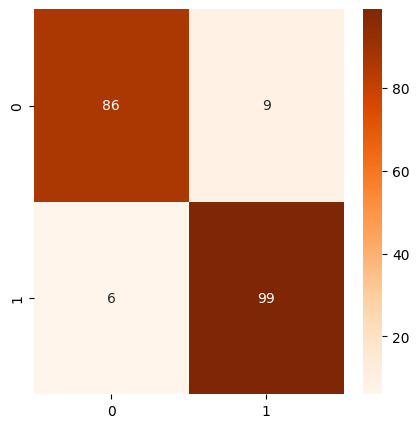

In [17]:
# svm model on test data
svc2 = SVC(**bestp)
svc2.fit(X_train,y_train)
test_pred = grid_search.predict(X_test)
acc = accuracy_score(test_pred,y_test)
cm = confusion_matrix(test_pred,y_test)
print(f"Accuracy: {acc}\nConfusion Matrix:\n{cm}")
plt.figure(figsize=(5,5))
sb.heatmap(cm,cmap='Oranges',annot=True)

Test Accuracy: 0.925


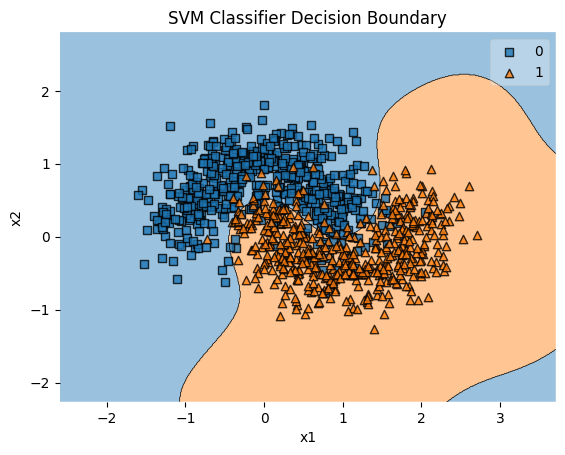

In [18]:
# plot decision boundary with mlxtend
plot_decision_regions(X,y,clf=svc2,legend=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Classifier Decision Boundary')
print(f"Test Accuracy: {acc}")
plt.show()